In [1]:
! mv /mnt/c/Users/ldhag/Downloads/COVID-19_Daily_Surveillance_Data_Public.csv .

mv: cannot remove '/mnt/c/Users/ldhag/Downloads/COVID-19_Daily_Surveillance_Data_Public.csv': Permission denied


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
%matplotlib inline

In [3]:
df_sa = pd.read_csv('COVID-19_Daily_Surveillance_Data_Public.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_sa.sort_values(by = 'reporting_date')

,X,Y,objectid,globalid,reporting_date,total_case_daily_change,total_case_cumulative,deaths_daily_change,deaths_cumulative,strac_covid_positive_in_hospita,strac_covid_positive_in_icu,strac_covid_positive_on_ventila,strac_total_ventilators,strac_available_ventilators,strac_total_staffed_beds,strac_available_staffed_beds,count_7_day_moving_avg,change_in_7_day_moving_avg,deaths_under_investigation
0,NaN,NaN,1,{2EBBCC63-C35B-41E5-9137-0DD41C3B4735},2020/02/12 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2,{864994C8-C30A-4CD4-8613-7547D7042CCC},2020/02/13 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3,{9473983C-6BE0-4302-86E4-9F443AB3F5D3},2020/02/14 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4,{E5D04D10-8256-4549-AA7D-AE1E08AF31C0},2020/02/15 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5,{670FC8EB-EB50-4312-A1C4-54317022E533},2020/02/16 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,6,{7C5C759F-BE2A-4449-B083-25ABB4ACB0A3},2020/02/17 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,7,{76856BB8-399E-44A5-8007-CDD84F74EB4B},2020/02/18 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,8,{0A130471-4B06-40F2-96D1-C0CF82FFD8D5},2020/02/19 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,9,{A8DA0C1B-7BD6-450E-93E2-FA69B7724203},2020/02/20 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,10,{6086FD87-0A2A-4EDF-BA57-2BAFD637E5B7},2020/02/21 06:00:00+00,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
type(df_sa.loc[:,'reporting_date'][400])

str

In [7]:
df_sa.reporting_date = pd.to_datetime(df_sa.reporting_date)

In [8]:
type(df_sa.loc[:,'reporting_date'][400])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_sa_dtindex = df_sa.set_index('reporting_date')

In [10]:
df_sa.reporting_date[0]

Timestamp('2020-02-12 06:00:00+0000', tz='UTC')

In [11]:
df_newcases = df_sa_dtindex.loc[:,['total_case_daily_change']]

In [12]:
df_newcases_7day_moving= df_newcases.rolling(7).mean().shift()

In [13]:
! pwd

/var/tmp/ldh/repos/Texas_Covid_Data_Notebook


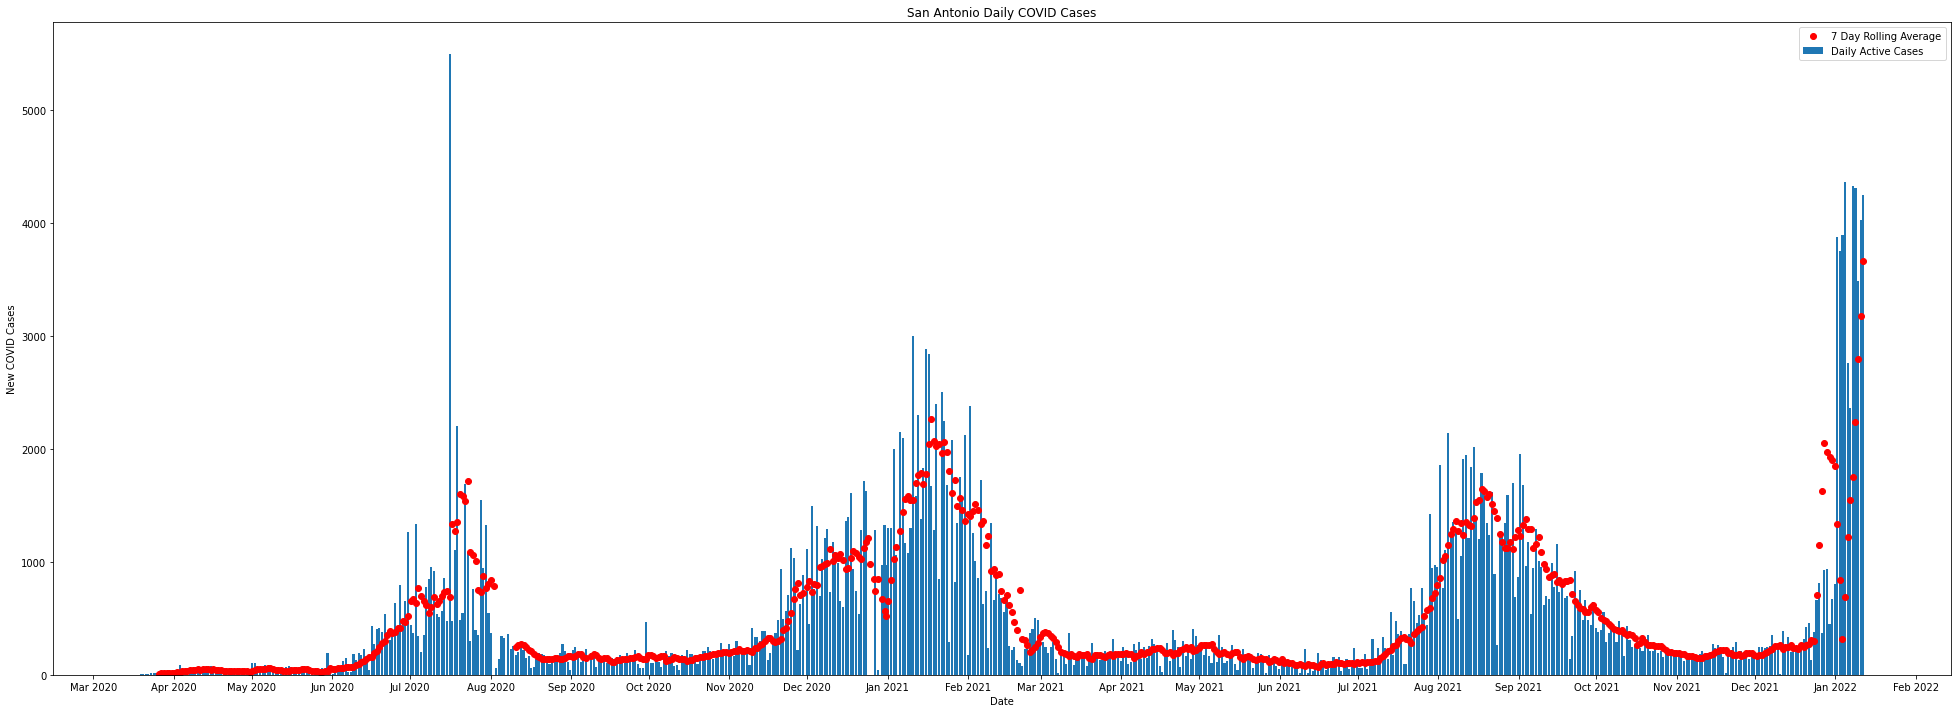

In [14]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(34,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Cases')
plt.xlabel('Date',color='black')
plt.ylabel('New COVID Cases',color='black')
plt.bar(df_newcases.index,df_newcases.total_case_daily_change)
plt.plot(df_newcases_7day_moving, 'ro')
plt.legend(['7 Day Rolling Average','Daily Active Cases'])
fig.savefig('MetroDailySANew.png')

In [15]:
df_sa_covid_icu = df_sa_dtindex.loc[:,['strac_covid_positive_in_icu']]

In [16]:
df_sa_covid_icu.sort_values(by = 'reporting_date')

,strac_covid_positive_in_icu
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
2020-02-17 06:00:00+00:00,NaN
2020-02-18 06:00:00+00:00,NaN
2020-02-19 06:00:00+00:00,NaN
2020-02-20 06:00:00+00:00,NaN


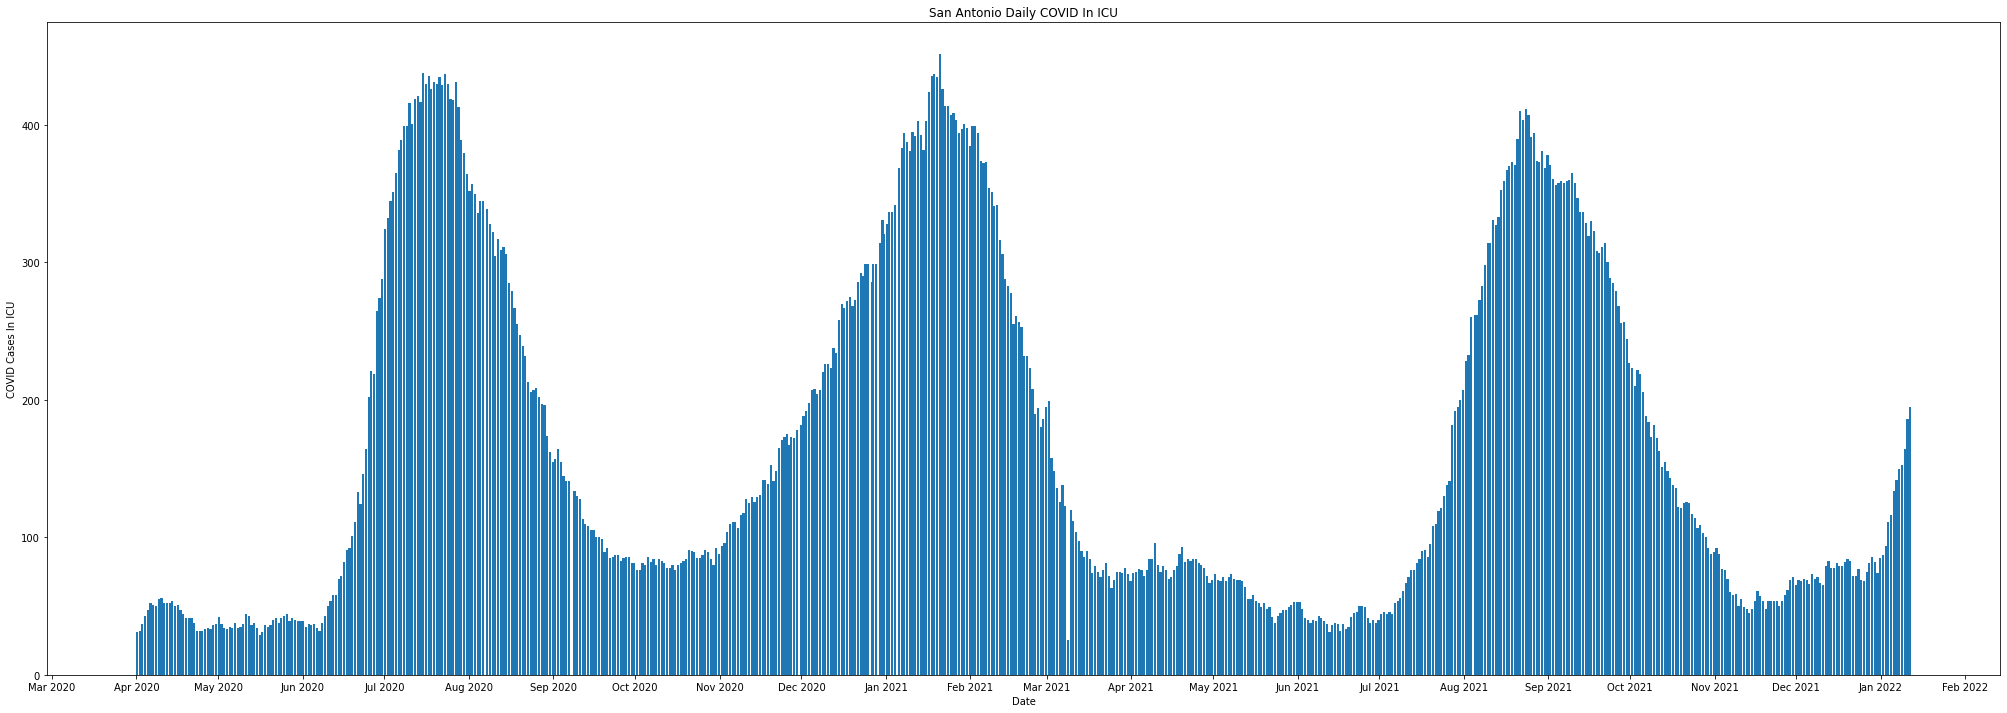

In [17]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID In ICU')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Cases In ICU',color='black')
plt.bar(df_sa_covid_icu.index,df_sa_covid_icu.strac_covid_positive_in_icu)
fig.savefig('MetroICUSANew.png')

In [18]:
df_sa_deaths = df_sa_dtindex.loc[:,['deaths_daily_change']]

In [19]:
df_sa_deaths_7day_moving= df_sa_deaths.rolling(7).mean().shift()

In [20]:
df_sa_deaths.sort_values(by = 'reporting_date')

,deaths_daily_change
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
2020-02-17 06:00:00+00:00,NaN
2020-02-18 06:00:00+00:00,NaN
2020-02-19 06:00:00+00:00,NaN
2020-02-20 06:00:00+00:00,NaN


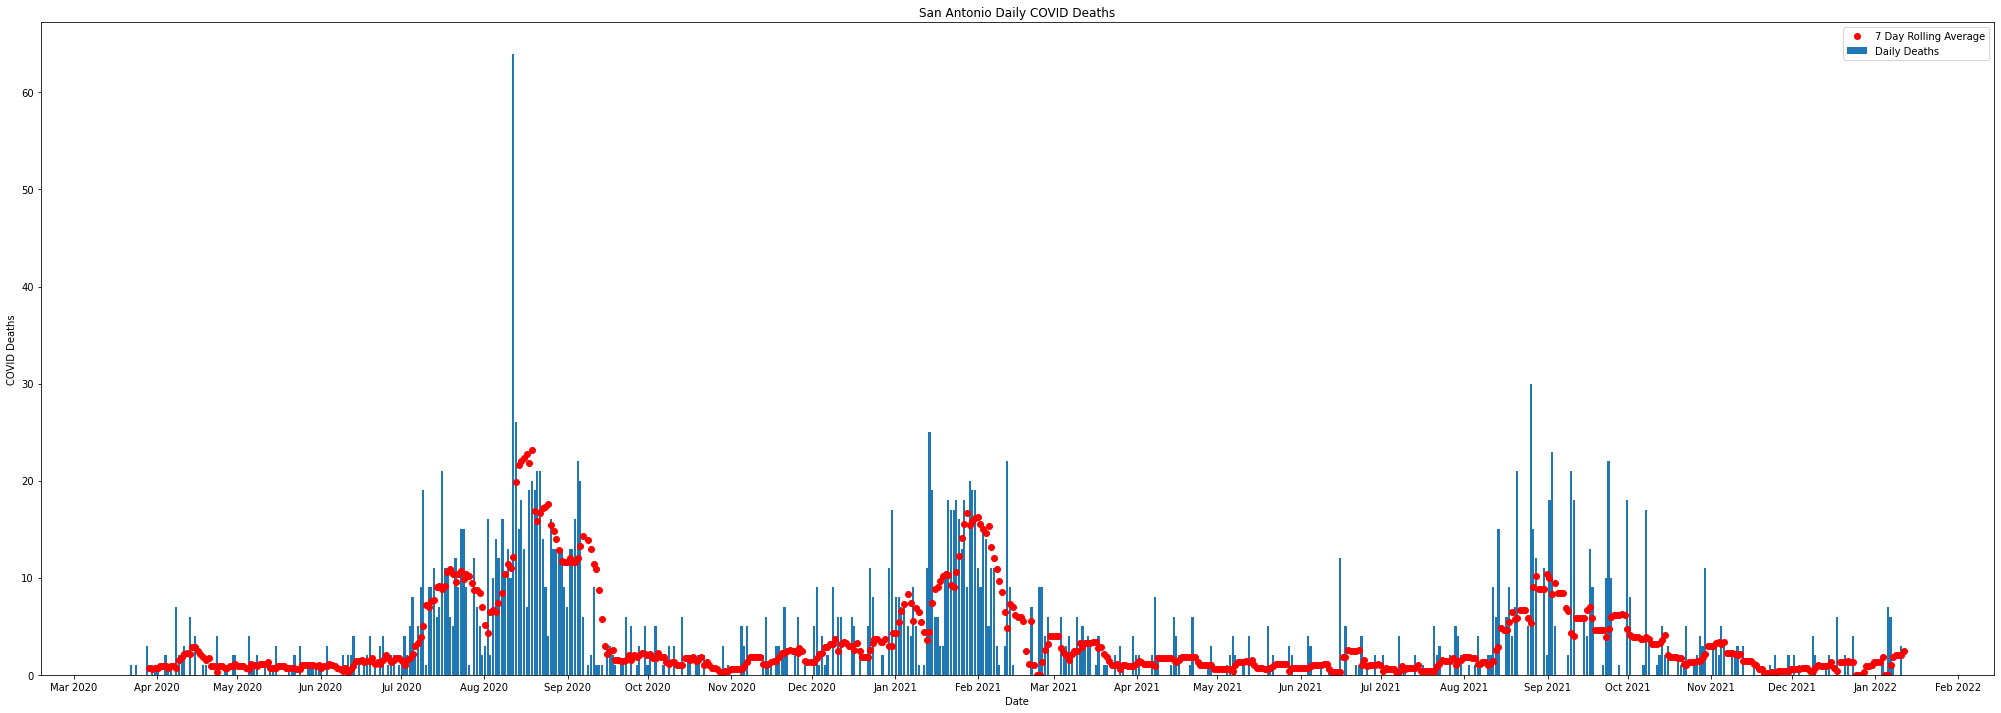

In [21]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Deaths')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Deaths',color='black')
plt.bar(df_sa_deaths.index,df_sa_deaths.deaths_daily_change)
plt.plot(df_sa_deaths_7day_moving, 'ro')
plt.legend(['7 Day Rolling Average','Daily Deaths'])
fig.savefig('MetroDeathsSANew.png')

In [22]:
df_sa_deaths.index[-60:]

DatetimeIndex(['2021-11-13 18:00:00+00:00', '2021-11-14 18:00:00+00:00',
               '2021-11-15 18:00:00+00:00', '2021-11-16 18:00:00+00:00',
               '2021-11-17 18:00:00+00:00', '2021-11-18 18:00:00+00:00',
               '2021-11-19 18:00:00+00:00', '2021-11-20 18:00:00+00:00',
               '2021-11-21 18:00:00+00:00', '2021-11-22 18:00:00+00:00',
               '2021-11-23 18:00:00+00:00', '2021-11-24 18:00:00+00:00',
               '2021-11-25 18:00:00+00:00', '2021-11-26 18:00:00+00:00',
               '2021-11-27 18:00:00+00:00', '2021-11-28 18:00:00+00:00',
               '2021-11-29 18:00:00+00:00', '2021-11-30 18:00:00+00:00',
               '2021-12-01 18:00:00+00:00', '2021-12-02 18:00:00+00:00',
               '2021-12-03 18:00:00+00:00', '2021-12-04 18:00:00+00:00',
               '2021-12-05 18:00:00+00:00', '2021-12-06 18:00:00+00:00',
               '2021-12-07 18:00:00+00:00', '2021-12-08 18:00:00+00:00',
               '2021-12-09 18:00:00+00:00', '2021-1

In [23]:
df_sa_hospital = df_sa_dtindex.loc[:,['strac_covid_positive_in_hospita']]

In [24]:
df_sa_hospital.sort_values(by = 'reporting_date')

,strac_covid_positive_in_hospita
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
2020-02-17 06:00:00+00:00,NaN
2020-02-18 06:00:00+00:00,NaN
2020-02-19 06:00:00+00:00,NaN
2020-02-20 06:00:00+00:00,NaN


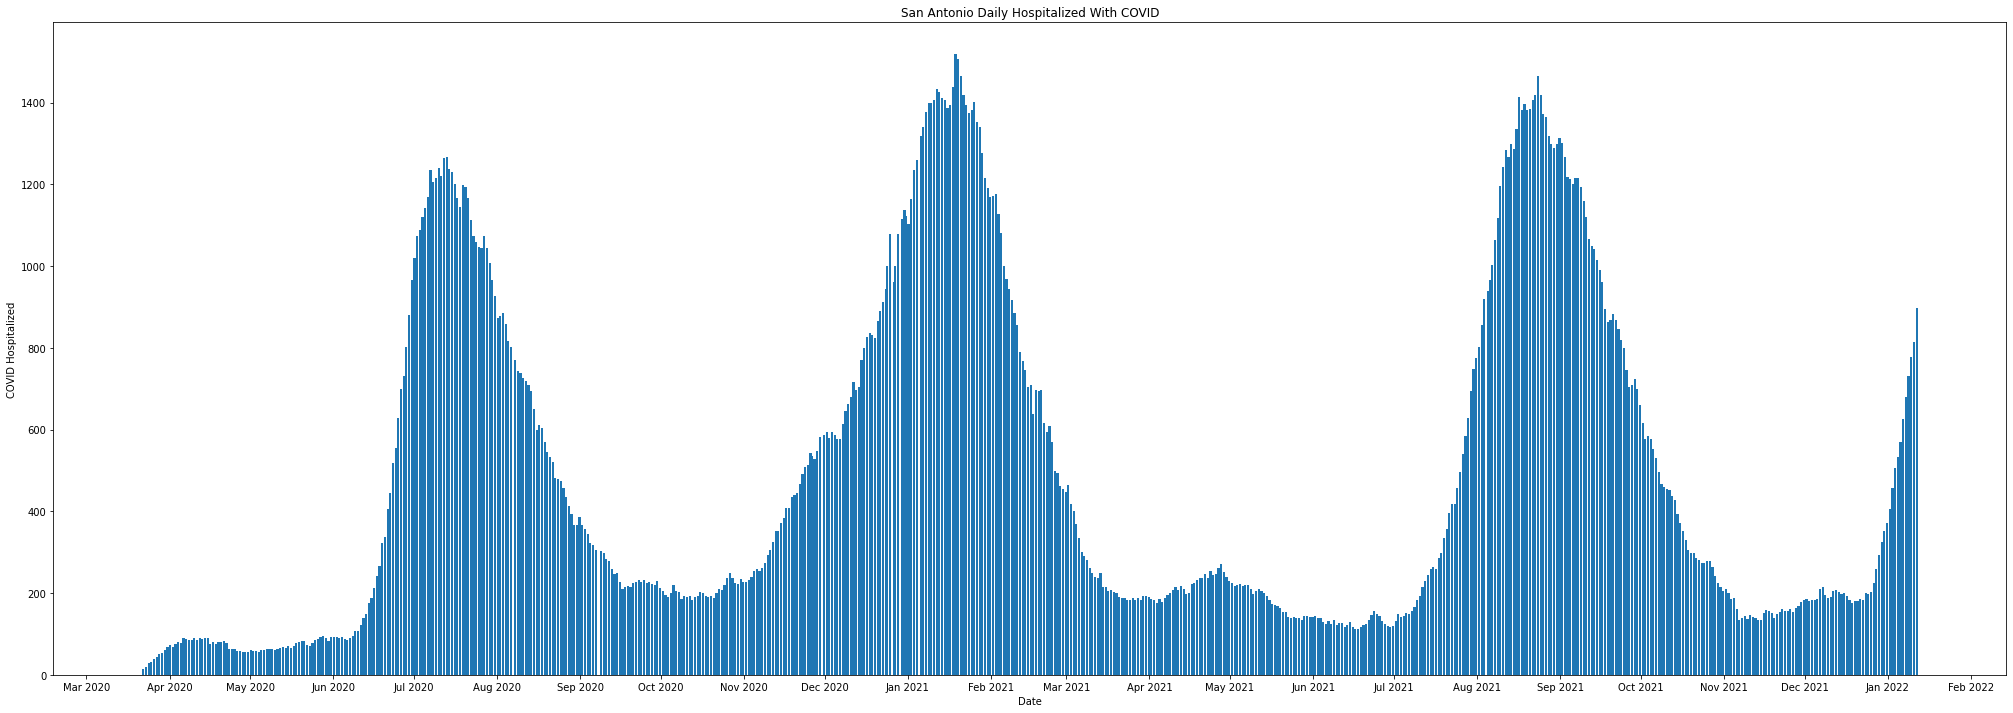

In [25]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily Hospitalized With COVID')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Hospitalized',color='black')
plt.bar(df_sa_hospital.index,df_sa_hospital.strac_covid_positive_in_hospita)
fig.savefig('MetroHospitalSANew.png')

In [26]:
df_sa_availbeds = df_sa_dtindex.loc[:,['strac_available_staffed_beds']]

In [27]:
df_sa_availbeds

,strac_available_staffed_beds
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
2020-02-17 06:00:00+00:00,NaN
2020-02-18 06:00:00+00:00,NaN
2020-02-19 06:00:00+00:00,NaN
2020-02-20 06:00:00+00:00,NaN


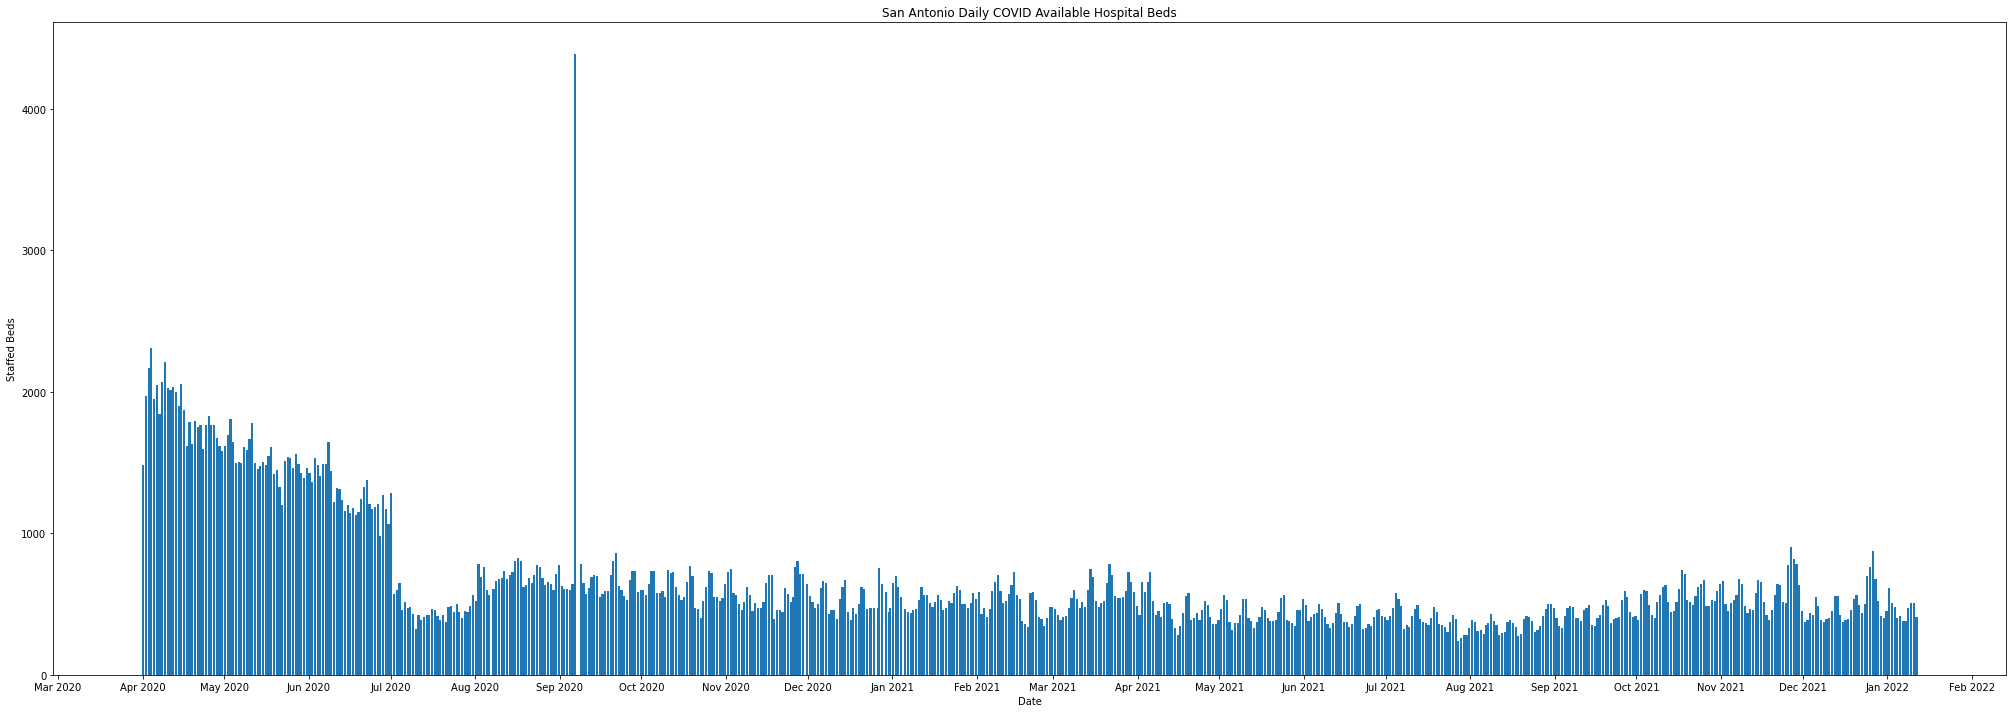

In [28]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Available Hospital Beds')
plt.xlabel('Date',color='black')
plt.ylabel('Staffed Beds',color='black')
plt.bar(df_sa_availbeds.index,df_sa_availbeds.strac_available_staffed_beds)
fig.savefig('MetroAvailBedsSANew.png')